<a href="https://colab.research.google.com/github/GSelvakumar/ml/blob/main/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Notebook imports and Packages

In [9]:
import matplotlib.pyplot as plt
import numpy as np

**EXAMPLE 1 => A SIMPLE COST FUNCTION**

$f(x) = x^2 + x + 1$

In [10]:
def f(x):
  return x**2 + x + 1

In [11]:
x1 = np.linspace(start=-3, stop= 3, num= 500)


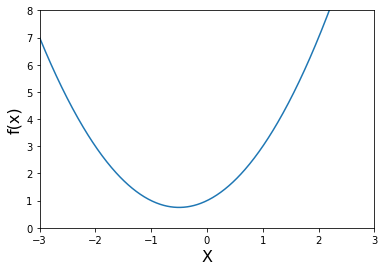

In [12]:
#Plot

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x1, f(x1))
plt.show()

Derivative of function ($f(x) = x^2 + x + 1$)  is  $df(x)$ which is $2x + 1$

In [13]:
def df(x):
  return 2*x + 1

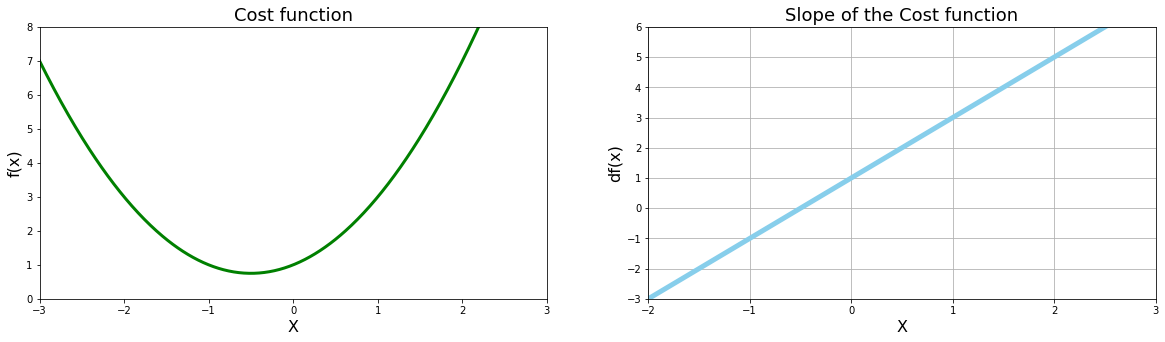

In [14]:
#Plot function and derivaties side by side

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x1, f(x1), color='green', linewidth=3)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.plot(x1, df(x1), color='skyblue', linewidth=5)

plt.show()

##Gradient Descent

It is the optimization algorithm for finding the minimum of the function.

In [15]:
new_x = 3
previous_x = 0 #temporary variable
step_multiplier = 0.1 #learning rate or gamma
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * gradient # minus sign indicates that going steep down towards the gradient 

  step_size = abs(new_x - previous_x)

  x_list.append(new_x)
  slope_list.append(df(new_x))

  if step_size < precision:
    print("loop ran this many times:", n)
    break

print("Local minimum occurs at: ", new_x)
print("Slope or df(x) value at this point is: ",df(new_x))
print("f(x) value or cost at this point is: ", f(new_x))

loop ran this many times: 50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


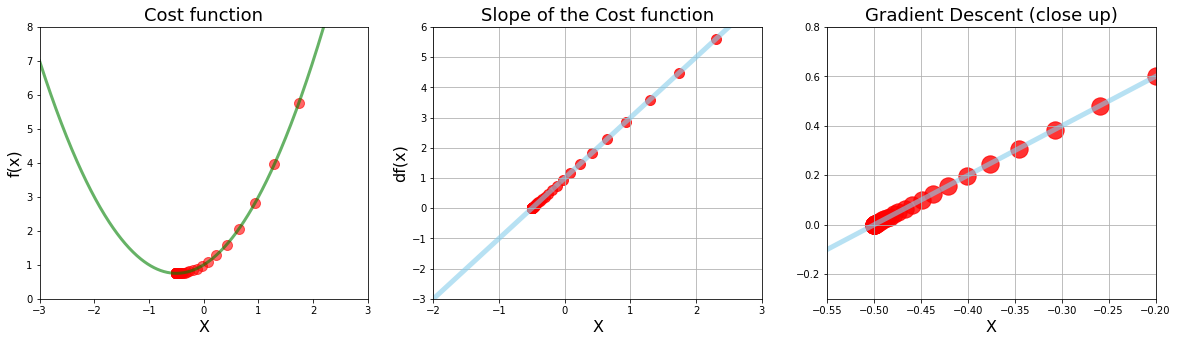

In [16]:
#The Gradient descent calculations on plot

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 3, 1) #(rows, columns, index)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100, alpha=0.6)

plt.plot(x1, f(x1), color='green', linewidth=3, alpha=0.6)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 3, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color="red", s=100,alpha=0.8)

#Chart 2: Derivative (Close up)
plt.subplot(1, 3, 3)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.grid()
plt.title("Gradient Descent (close up)", fontsize=18)
plt.xlabel("X", fontsize=16)

plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color="red", s=300,alpha=0.8)

plt.show()

##Multiple Minima Vs Initial guess

$$ g(x) = x^4 - 4x^2 + 5$$

In [17]:
#generate data using numpy

x2 = np.linspace(-2, 2, 1000)

def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x

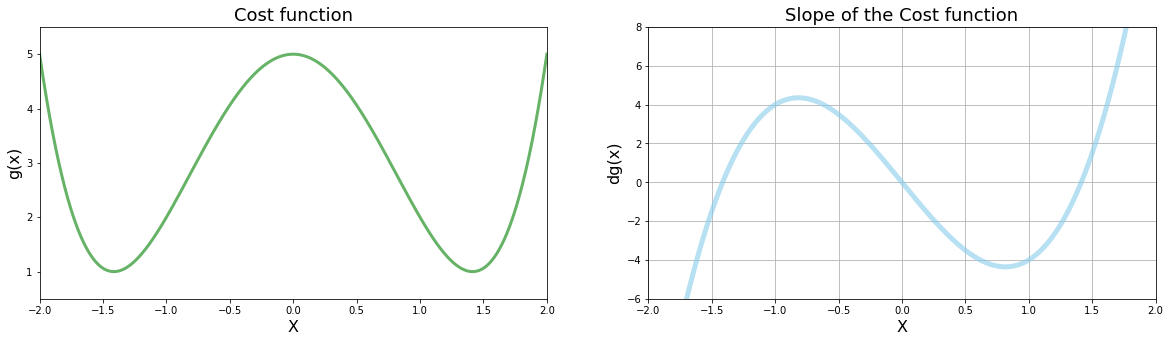

In [18]:
#The Gradient descent calculations on plot

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x2, g(x2), color='green', linewidth=3, alpha=0.6)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x2, dg(x2), color='skyblue', linewidth=5, alpha=0.6)

plt.show()

##Gradient descent as a Python function

In [19]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision):

  new_x = initial_guess

  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range(500):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    new_x = previous_x - multiplier * gradient # minus sign indicates that going steep down towards the gradient 

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision:
      print("loop ran this many times:", n)
      break
  return new_x, x_list, slope_list


In [20]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print("Local min occurs at: ", local_min)
print("Number of steps: ", len(list_x))

loop ran this many times: 21
Local min occurs at:  1.4122375085019094
Number of steps:  23


In [21]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.02, precision=0.001)
print("Local min occurs at: ", local_min)
print("Number of steps: ", len(list_x))

loop ran this many times: 21
Local min occurs at:  -1.4122375085019094
Number of steps:  23
